# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

#%load_ext pycodestyle_magic

In [253]:
class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        if init == 'random':
            self.centrs = self.centrs_random
        if init == 'k-means':
            self.centrs= self.centrs_plus

    def centrs_random(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k)]

    def centrs_plus(self, X):
        sqr_x = (X ** 2).sum(axis=1)
        self.centroids[0] = X[np.random.choice(X.shape[0])]
        for i in range(1, self.k):
            mul_x = np.dot(X, self.centroids[:i].T)
            sqr_centrs = (self.centroids[:i] ** 2).sum(axis=1)
            sqr_dist  = sqr_x.reshape(-1, 1) + sqr_centrs - 2 * mul_x 
            dist = np.min(sqr_dist, axis=1)
            self.centroids[i] = X[np.random.choice(X.shape[0], size = 1, p = abs(dist/dist.sum()))]

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here
        self.centrs(X)
        eps = 1e-10
        centroids = np.empty((self.k, X.shape[1]))
        for iters in range(self.max_iter):
            sqr_x = (X ** 2).sum(axis=1)
            mul_x = np.dot(self.centroids, X.T)
            sqr_centrs = (self.centroids ** 2).sum(axis=1)
            sqr_dist  = sqr_x + sqr_centrs.reshape(-1, 1) - 2 * mul_x 
            self.labels = np.argmin(sqr_dist, axis=0)
            for i in range(self.k):
                centroids[i] = (X[self.labels == i, :]).mean(axis = 0)
            if ((centroids - self.centroids) ** 2).sum() < eps:
                return self
            self.centroids = centroids
        self.labels = np.abs(self.labels)
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        
        """
        sqr_x = (X ** 2).sum(axis=1)
        mul_x = np.dot(self.centroids, X.T)
        sqr_centrs = (self.centroids ** 2).sum(axis=1)
        sqr_dist  = sqr_x + sqr_centrs.reshape(-1, 1) - 2 * mul_x 
        self.labels = np.argmin(sqr_dist, axis=0)
        return self.labels

class MiniBatchKMeans(MyKmeans):

    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random', batch_size=10):
        self.batch_size = batch_size
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        if init == 'random':
            self.centrs = self.centrs_random
        if init == 'k-means':
            self.centrs = self.centrs_plus

    def fit(self, X):
         # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])
        
        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here
        self.centrs(X)
        eps = 1e-5
        centroids = np.empty((self.k, X.shape[1]))
        
        for iters in range(self.max_iter):
            np.random.shuffle(X)
            batch = X[:self.batch_size]
            sqr_batch = np.sum(batch ** 2, axis=1)
            mul_batch = np.dot(self.centroids, batch.T)
            sqr_centrs = (self.centroids ** 2).sum(axis=1)
            sqr_dist  = sqr_batch + sqr_centrs.reshape(-1, 1) - 2 * mul_batch
            self.labels = np.argmin(sqr_dist, axis=0)
            for i in range(self.k):
                if self.labels[self.labels == i].shape[0] != 0:
                    centroids[i] = np.mean(batch[self.labels == i, :], axis = 0)
            if np.sum((centroids - self.centroids) ** 2) < eps:
                return self
            self.centroids = centroids
        sqr_x = np.sum(X ** 2, axis=1)
        mul_x = np.dot(self.centroids, X.T)
        sqr_centrs = np.sum(self.centroids ** 2, axis=1)
        sqr_dist  = sqr_x + sqr_centrs.reshape(-1, 1) - 2 * mul_x 
        self.labels = np.argmin(sqr_dist, axis=0)
        self.labels = np.abs(self.labels)
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [254]:
from sklearn.datasets import make_blobs

In [255]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

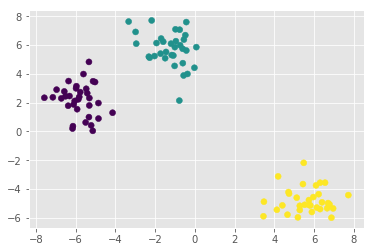

In [256]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [257]:
def work(model):
    model.fit(X)
    y = model.predict(X)
    plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=100)
    plt.scatter(X[:,0], X[:, 1], c = y)


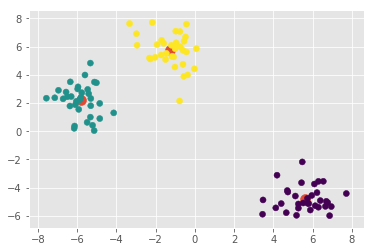

In [258]:
## Работоспособность MyKmeans
work(MyKmeans(k=3))

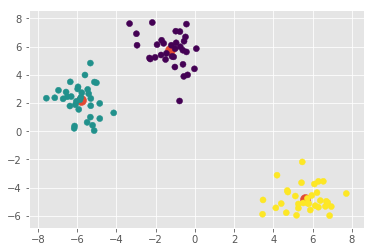

In [259]:
## Работоспособность MyKmeans++
work(MyKmeans(k=3, init='k-means'))

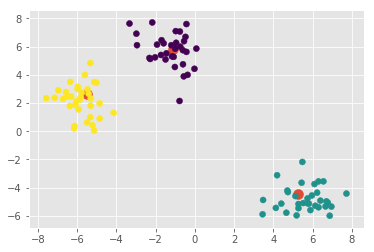

In [260]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
work(MiniBatchKMeans(k=3))

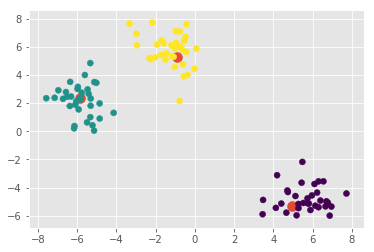

In [261]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
work(MiniBatchKMeans(k=3, init='k-means'))

In [262]:
import time

In [263]:
def times(model):
    number = [100, 200, 500, 1000, 2000, 5000, 10000, 50000, 100000]
    times = []
    for s in number:
        X, y = make_blobs(n_samples=s, n_features=2, centers=3, cluster_std=1, 
               center_box=(-10.0, 10.0), shuffle=False, random_state=123)
        t1 = time.time()
        model.fit(X)
        t2 = time.time()
        times.append(t2 - t1)
    plt.plot(number, times)
    plt.xlabel('number')
    plt.ylabel('time')


In [264]:
## Время выполнения алгоритма Kmeans из sklearn
from sklearn.cluster import KMeans

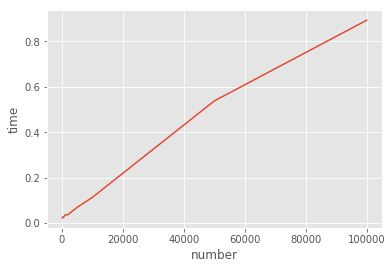

In [265]:
times(KMeans(n_clusters=3))

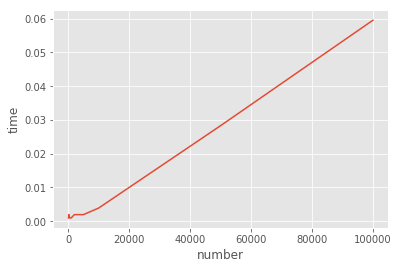

In [266]:
## Время выполнения алгоритма MyKmeans
times(MyKmeans(k=3))

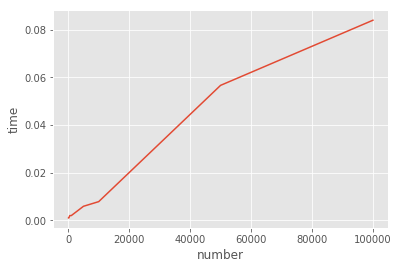

In [267]:
## Время выполнения алгоритма MyKmeans++
times(MyKmeans(k=3, init='k-means'))

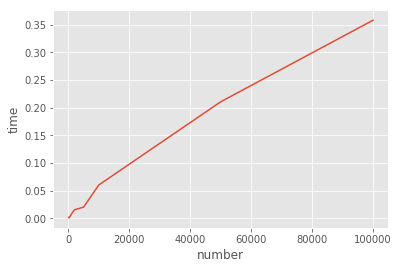

In [268]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
times(MiniBatchKMeans(k=3))

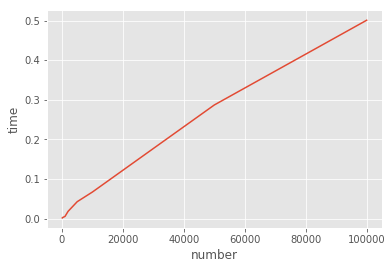

In [269]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
times(MiniBatchKMeans(k=3, init='k-means'))

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [270]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [282]:
X = df_sns.drop(df_sns.columns[:4], axis=1)
X = (X - X.mean(axis=0)) / X.std(axis=0)

def prediction(model):
    model.fit(X.values)
    label = X
    label.loc[:, 'label'] = model.predict(X.values)
    for c, group in label.groupby('label'):
        print('Cluster: {}'.format(c))
        print(group.iloc[:, 4:-1].mean().abs().nlargest(5))
        print('=' * 10 + '\n')

In [290]:
## MyKMeans
%time prediction(MyKmeans(k=9))

Cluster: 0
cheerleading    5.232285
shopping        0.569707
abercrombie     0.520419
hollister       0.438004
cute            0.298087
dtype: float64

Cluster: 1
sports      0.297118
mall        0.273841
hair        0.215781
shopping    0.203702
dance       0.186209
dtype: float64

Cluster: 2
jesus         3.369019
bible         2.061034
god           1.892597
volleyball    1.710920
church        1.693004
dtype: float64

Cluster: 3
dance       3.261150
band        0.882205
marching    0.706045
dress       0.633926
music       0.560013
dtype: float64

Cluster: 4
die      3.677440
death    1.427569
god      0.688972
rock     0.313474
music    0.259627
dtype: float64

Cluster: 5
sports      2.308745
baseball    0.823917
mall        0.200077
cute        0.180385
shopping    0.156235
dtype: float64

Cluster: 6
volleyball    2.703252
shopping      0.243902
hollister     0.172483
band          0.123309
dress         0.116856
dtype: float64

Cluster: 7
hair      2.396110
kissed    2.355258
dr

In [291]:
## MyKMeans++
%time prediction(MyKmeans(k=9, init='k-means'))

Cluster: 0
sports      0.282088
mall        0.260306
hair        0.208565
shopping    0.182535
clothes     0.172789
dtype: float64

Cluster: 1
dress    1.734160
dance    1.420417
death    1.145214
die      1.091345
band     0.605575
dtype: float64

Cluster: 2
kissed    6.066137
sex       5.112005
hair      3.968241
drugs     2.867398
rock      2.345637
dtype: float64

Cluster: 3
sports        0.637076
mall          0.488649
volleyball    0.325278
shopping      0.280085
sexy          0.235054
dtype: float64

Cluster: 4
baseball    8.756008
sports      1.049035
rock        0.400311
shopping    0.238148
church      0.217141
dtype: float64

Cluster: 5
drugs     2.535461
drunk     2.267725
hair      1.876313
kissed    1.778854
die       0.897821
dtype: float64

Cluster: 6
mall        4.520987
clothes     3.087792
shopping    2.387847
cute        1.511767
hair        0.860088
dtype: float64

Cluster: 7
church    4.289147
bible     3.319966
god       3.314711
jesus     3.271215
die       0.30

In [284]:
## MyKMeans с MiniBatchMyKMeans
%time prediction(MiniBatchKMeans(k=9, batch_size = 10))

Cluster: 0
kissed     6.148470
hair       5.038427
clothes    4.446302
drugs      3.420889
rock       3.395540
dtype: float64

Cluster: 1
death       1.104969
mall        0.704782
rock        0.606311
sports      0.282574
baseball    0.200162
dtype: float64

Cluster: 2
cute          1.193385
shopping      0.954425
church        0.868549
clothes       0.542295
volleyball    0.454431
dtype: float64

Cluster: 3
cheerleading    0.758696
dance           0.382564
drunk           0.293877
hollister       0.289032
shopping        0.274755
dtype: float64

Cluster: 4
shopping    0.300203
cute        0.290052
music       0.235440
church      0.214334
mall        0.213252
dtype: float64

Cluster: 5
swimming    1.016366
mall        0.661301
music       0.618377
shopping    0.596543
kissed      0.563741
dtype: float64

Cluster: 6
god        1.123769
clothes    0.703372
drunk      0.679833
hair       0.528469
kissed     0.459899
dtype: float64

Cluster: 7
marching      9.783886
band          8.593583

In [289]:
## MyKMeans++ с MiniBatchMyKMeans
%time prediction(MiniBatchKMeans(k=9, init='k-means', batch_size = 100))

Cluster: 0
mall        0.669916
cute        0.387884
hot         0.322005
god         0.316278
shopping    0.305949
dtype: float64

Cluster: 1
abercrombie    1.266859
mall           1.250012
hollister      1.167224
hair           1.150334
shopping       1.128905
dtype: float64

Cluster: 2
shopping    0.357821
mall        0.311071
music       0.289682
hair        0.287914
cute        0.268883
dtype: float64

Cluster: 3
baseball        0.206216
mall            0.190432
cheerleading    0.189054
death           0.180718
band            0.168490
dtype: float64

Cluster: 4
marching    6.872737
band        4.670701
drugs       1.873485
church      1.602234
sex         1.467772
dtype: float64

Cluster: 5
sports       6.517184
hair         3.373066
music        2.081424
baseball     2.005511
hollister    1.591738
dtype: float64

Cluster: 6
jesus     10.809409
bible     10.379536
god        6.110236
death      5.149784
blonde     3.075598
dtype: float64

Cluster: 8
volleyball    8.063249
sports 